## Bird classification - [American Goldfinch, Barn Owl, Carmine Bee-Eater, Downy Woodpecker, Emperor Penguin, Flamingo]

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



##### Data generation 

In [3]:
def create_data_generators(data_dir, target_size=(150, 150), batch_size=32, validation_split=0.2):
  
    datagen = ImageDataGenerator(
        rescale=1./255, 
        shear_range=0.2, 
        zoom_range=0.2, 
        horizontal_flip=True, 
        validation_split=validation_split
    )
    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=target_size,  
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    return train_generator, validation_generator

data_dir = 'Bird Speciees Dataset'
train_generator, validation_generator = create_data_generators(data_dir)

Found 652 images belonging to 6 classes.
Found 159 images belonging to 6 classes.


##### Model creation

In [4]:
def birdsClassifier(input_shape=(150, 150, 3), num_classes=6, dropout_rate=0.5, learning_rate=0.001):

    model = Sequential()

    # First Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Conv layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Conv layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))  
    model.add(Dense(num_classes, activation='softmax')) 

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [5]:
input_shape = (150, 150, 3)
num_classes = 6  

model = birdsClassifier(input_shape=input_shape, num_classes=num_classes)

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [6]:
history = model.fit(
    train_generator,
    epochs=25,  
    validation_data=validation_generator
)


Epoch 1/25


21/21 [==============================] - 14s 602ms/step - loss: 1.6813 - accuracy: 0.3405 - val_loss: 1.2118 - val_accuracy: 0.6352
Epoch 2/25
21/21 [==============================] - 7s 332ms/step - loss: 1.0578 - accuracy: 0.6227 - val_loss: 0.8191 - val_accuracy: 0.7296
Epoch 3/25
21/21 [==============================] - 7s 331ms/step - loss: 0.7653 - accuracy: 0.7193 - val_loss: 0.4597 - val_accuracy: 0.8428
Epoch 4/25
21/21 [==============================] - 8s 366ms/step - loss: 0.5061 - accuracy: 0.8206 - val_loss: 0.3340 - val_accuracy: 0.8994
Epoch 5/25
21/21 [==============================] - 8s 386ms/step - loss: 0.4319 - accuracy: 0.8282 - val_loss: 0.3478 - val_accuracy: 0.9057
Epoch 6/25
21/21 [==============================] - 8s 382ms/step - loss: 0.3889 - accuracy: 0.8451 - val_loss: 0.2663 - val_accuracy: 0.9182
Epoch 7/25
21/21 [==============================] - 9s 429ms/step - loss: 0.3551 - accuracy: 0.8650 - val_loss: 0.3712 - val_accuracy: 0.8742
Epo

##### metrics visuals

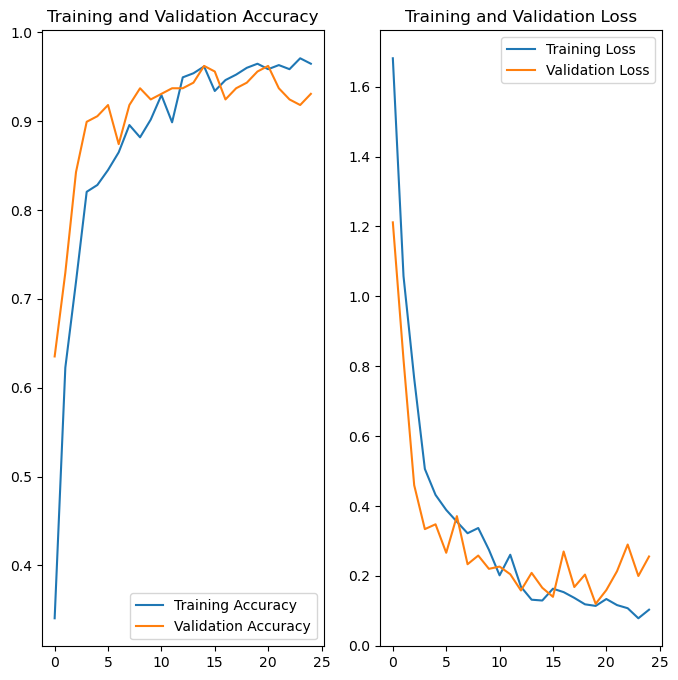

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
